In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [ ]:
# Load your data (assuming the embeddings and labels are already loaded as torch tensors)
train_embeddings = torch.load('Fine_tuned_embeddings/train_embeddings.pt').to('cpu')
test_embeddings = torch.load('Fine_tuned_embeddings/test_embeddings.pt').to('cpu')
val_embeddings = torch.load('Fine_tuned_embeddings/val_embeddings.pt').to('cpu')

train_labels = torch.load('Fine_tuned_embeddings/train_labels_tensor.pt').to('cpu')
test_labels = torch.load('Fine_tuned_embeddings/test_labels_tensor.pt').to('cpu')
val_labels = torch.load('Fine_tuned_embeddings/val_labels_tensor.pt').to('cpu')

In [ ]:
# Convert to numpy arrays for scikit-learn compatibility
X_train = train_embeddings.numpy()
y_train = train_labels.numpy()

X_val = val_embeddings.numpy()
y_val = val_labels.numpy()

X_test = test_embeddings.numpy()
y_test = test_labels.numpy()

In [ ]:
# Instantiate the model
lr_model = LogisticRegression(max_iter=1000)

# Train the model
lr_model.fit(X_train, y_train)

# Predict probabilities
train_probs = lr_model.predict_proba(X_train)[:, 1]
val_probs = lr_model.predict_proba(X_val)[:, 1]
test_probs = lr_model.predict_proba(X_test)[:, 1]

# Predict classes
train_preds = lr_model.predict(X_train)
val_preds = lr_model.predict(X_val)
test_preds = lr_model.predict(X_test)

Train Set Metrics:
Accuracy: 0.9074
Precision: 0.9102
Recall: 0.9041
F1 Score: 0.9071
ROC AUC Score: 0.9659

Validation Set Metrics:
Accuracy: 0.9043
Precision: 0.9043
Recall: 0.9043
F1 Score: 0.9043
ROC AUC Score: 0.9645

Test Set Metrics:
Accuracy: 0.9070
Precision: 0.9105
Recall: 0.9028
F1 Score: 0.9066
ROC AUC Score: 0.9659



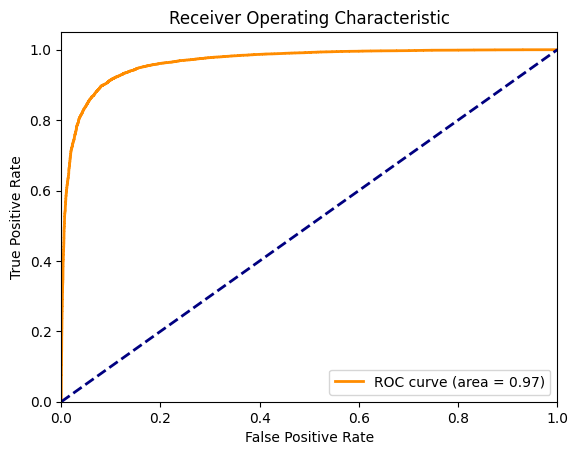

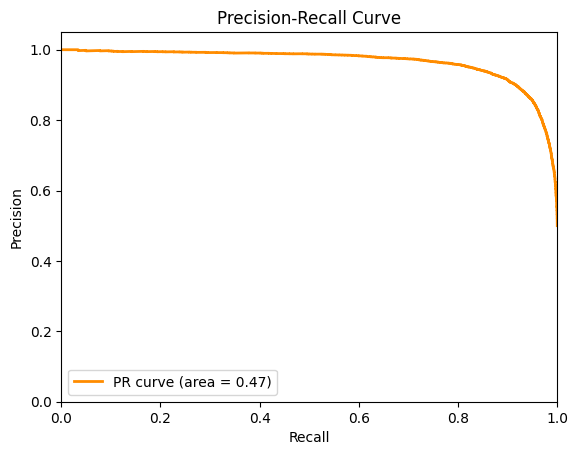

In [2]:
# Metrics calculation
def print_metrics(y_true, y_pred, y_probs, dataset_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_probs)
    
    print(f"{dataset_name} Set Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print()
    
    return accuracy, precision, recall, f1, roc_auc

print_metrics(y_train, train_preds, train_probs, "Train")
print_metrics(y_val, val_preds, val_probs, "Validation")
print_metrics(y_test, test_preds, test_probs, "Test")



In [ ]:
# Plot ROC curve
def plot_roc_curve(y_true, y_probs, dataset_name):
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    roc_auc = roc_auc_score(y_true, y_probs)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Plot Precision-Recall curve
def plot_precision_recall_curve(y_true, y_probs, dataset_name):
    precision, recall, _ = precision_recall_curve(y_true, y_probs)
    pr_auc = np.trapz(recall, precision)
    
    plt.figure()
    plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

plot_roc_curve(y_test, test_probs, "Test")
plot_precision_recall_curve(y_test, test_probs, "Test")
